In [126]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap

from sklearn.model_selection import (
    GroupKFold,
    GroupShuffleSplit,
    KFold,
    ShuffleSplit,
    StratifiedGroupKFold,
    StratifiedKFold,
    StratifiedShuffleSplit,
    TimeSeriesSplit,
)

rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

In [127]:
okabeito_colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7']

In [128]:
cmap_classes = ListedColormap([okabeito_colors[0], okabeito_colors[4]])
cmap_groups = ListedColormap(okabeito_colors)
cmap_cv = ListedColormap(okabeito_colors[1:6])

/var/folders/x6/4jhswqxj0sqf_gkgq6lw6l880000gn/T/ipykernel_68957/1856674315.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_groups = cm.get_cmap('Dark2', 10)  # Use Dark2 colormap for groups


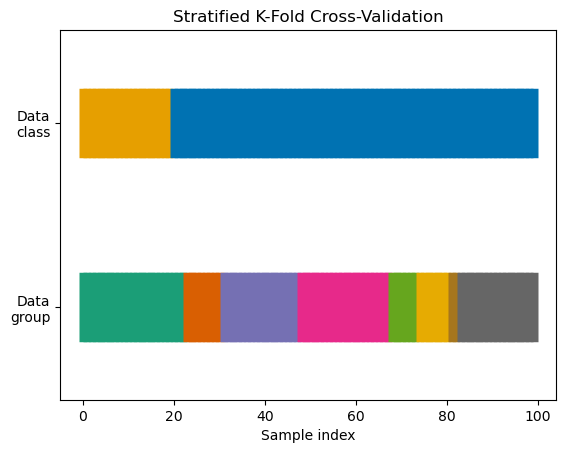

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

# Define Okabe-Ito color palette for classes
okabeito_colors = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#999999"]

# Generate the class/group data
rng = np.random.default_rng(seed=42)
n_points = 100
X = rng.standard_normal((n_points, 10))

percentiles_classes = [0.2, 0.8]
y = np.hstack([[ii] * int(n_points * perc) for ii, perc in enumerate(percentiles_classes)])

# Generate uneven groups
group_prior = rng.dirichlet([2] * 10)
groups = np.repeat(np.arange(10), rng.multinomial(n_points, group_prior))

# Define custom colormaps for classes and groups
cmap_classes = ListedColormap([okabeito_colors[0], okabeito_colors[4]])
cmap_groups = cm.get_cmap('Dark2', 10)  # Use Dark2 colormap for groups

def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups,
        marker="_",
        lw=50,
        cmap=cmap_groups,
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes,
        marker="_",
        lw=50,
        cmap=cmap_classes,
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=["Data\ngroup", "Data\nclass"],
        xlabel="Sample index",
    )
    plt.title(name)
    plt.show()

visualize_groups(y, groups, "Stratified K-Fold Cross-Validation")

In [130]:
['CV iteration {}'.format(i) for i in range(5)]


['CV iteration 0',
 'CV iteration 1',
 'CV iteration 2',
 'CV iteration 3',
 'CV iteration 4']

In [131]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""
    use_groups = "Group" in type(cv).__name__
    groups = group if use_groups else None
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=groups)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_classes
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_groups
    )

    # Formatting
    yticklabels = ['CV iteration {}'.format(i) for i in range(n_splits)] + ["Class", "Group"]

    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        # ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=10, color='#404040')

    # Customize plot appearance
    ax.spines['top'].set_color('#7F7F7F')  # gray50
    ax.spines['bottom'].set_color('#7F7F7F')
    ax.spines['left'].set_color('#7F7F7F')
    ax.spines['right'].set_color('#7F7F7F')
    ax.spines['top'].set_linewidth(0.25)
    ax.spines['bottom'].set_linewidth(0.25)
    ax.spines['left'].set_linewidth(0.25)
    ax.spines['right'].set_linewidth(0.25)
    ax.tick_params(axis='x', colors='#7F7F7F', labelsize='small')
    ax.tick_params(axis='y', colors='#7F7F7F', labelsize='small')
    ax.xaxis.label.set_color('#7F7F7F')
    ax.yaxis.label.set_color('#7F7F7F')
    ax.xaxis.label.set_fontname('Roboto Condensed')
    ax.yaxis.label.set_fontname('Roboto Condensed')
    ax.title.set_fontname('Roboto Condensed')
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontname('Roboto Condensed')

    return ax

<Axes: title={'center': 'KFold'}, xlabel='Sample index'>

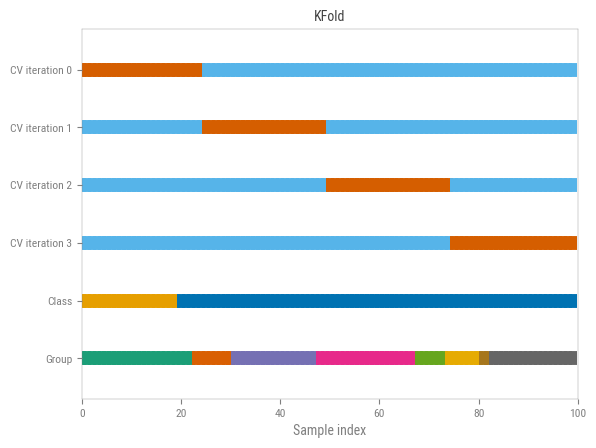

In [132]:
fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)

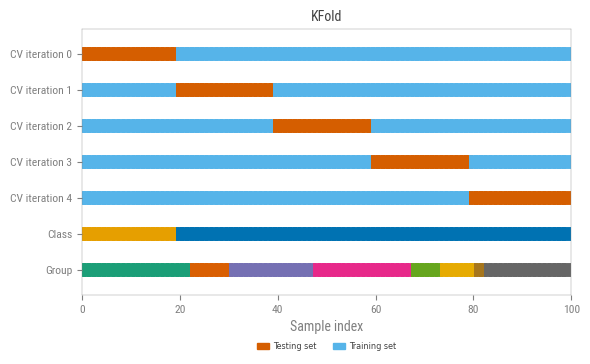

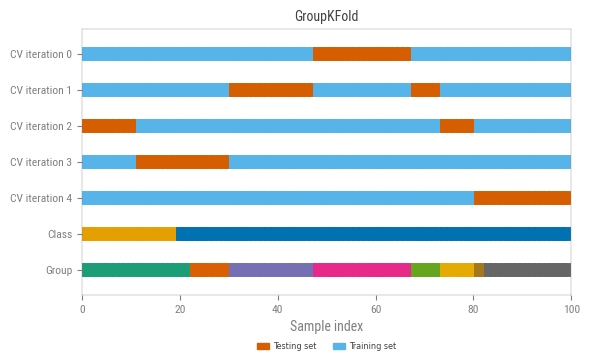

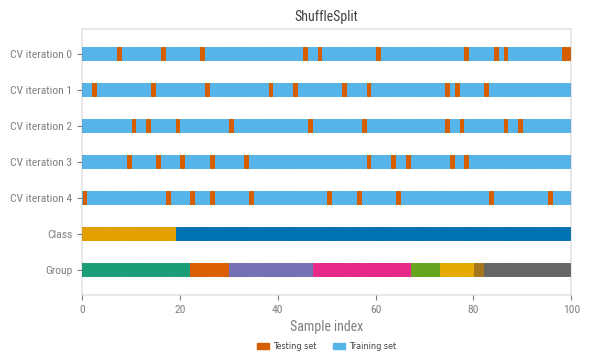

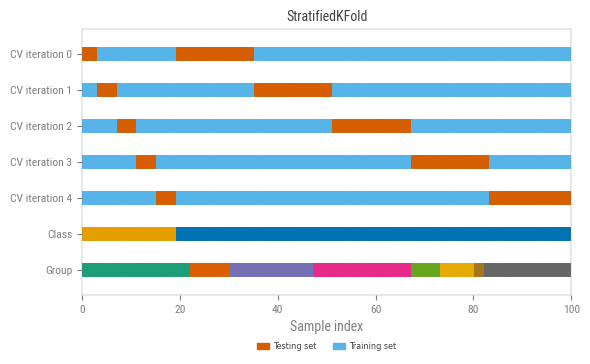

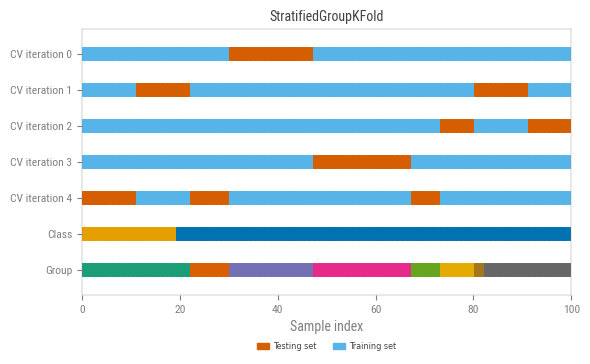

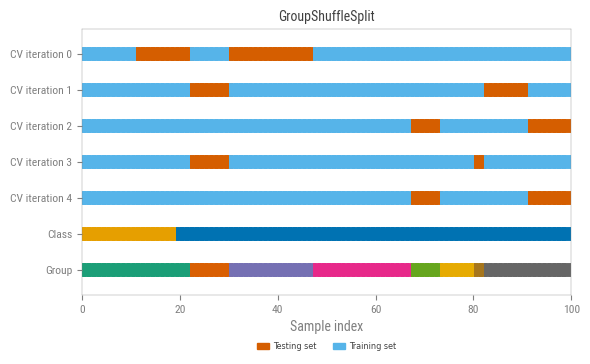

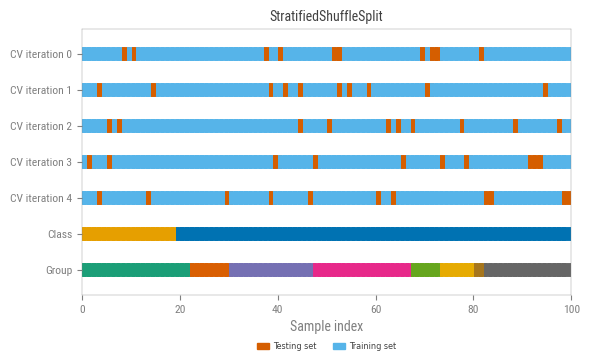

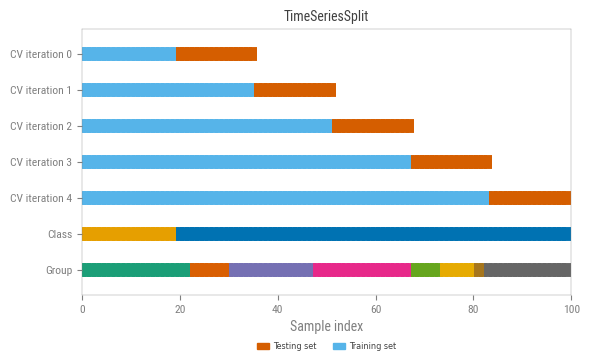

In [133]:
cvs = [
    KFold,
    GroupKFold,
    ShuffleSplit,
    StratifiedKFold,
    StratifiedGroupKFold,
    GroupShuffleSplit,
    StratifiedShuffleSplit,
    TimeSeriesSplit,
]

n_splits = 5
for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ['Testing set', 'Training set'],
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        fontsize='xx-small',
        frameon=False,
        handletextpad=0.5,
        handlelength=1.5,
        labelcolor='#404040',
        ncol=2  # Arrange legend items in a single row
    )
    ax.set_xlabel('Sample index')
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(bottom=0.0)  # Adjust bottom to make space for the legend

    # Save the plot as SVG
    filename = f'sklearn_k_fold_images/redux/{type(this_cv).__name__}.svg'
    fig.savefig(filename, format='svg')

plt.show()